In [4]:
import numpy as np
def kmeans(image, num_clusters, seed=0, max_iter=10000):
    np.random.seed(seed)
    img = image.reshape(-1, 3)
    index = 0

    clus_value = np.array(np.random.rand(num_clusters, 3) * 255, dtype=float)   # 记录每个簇的平均值，采用随机初始化
    while True:
        index += 1
        flag = clus_value.copy()  # 记录前一次的值，便于计算前后的变化，然后退出循环
        cs = []
        for i in range(num_clusters):   # 计算每个像素点到每个簇平均值的差值
            cs.append(np.square(img - clus_value[i]))
        cs = np.array(cs)
        cs = np.sum(cs, axis=2)  # 因为是三维的，所以需要将三个差值加起来作为总差值
        labels = np.argmin(cs, axis=0)  # 取最小值，返回簇的标号，离哪个簇最近就返回哪个簇
        for j in range(num_clusters):
            if len(img[labels == j]) != 0:   # 以簇内所有节点的平均值，作为簇的值
                clus_value[j] = img[labels == j].mean(axis=0)
        # 簇的值趋于稳定，或者达到最大迭代次数，则结束算法
        if np.sum(np.abs(clus_value - flag)) < 1e-8 or index == max_iter:
            break

    # label记录每个像素的簇编号，然后用簇平均值代替原像素值，最后返回图片
    # segmented_image = np.array(clus_value[labels].reshape(image.shape), dtype=np.uint8)
    # return segmented_image

    # 返回每个像素的所属簇编号
    return labels

In [5]:
def evaluate(y_pre, y_true):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    overlap = 0
    union = 0
    for i, value in enumerate(y_true):
        if y_pre[i] == value and y_pre[i] == 1:
            TP += 1
            overlap += 1
            union += 1
        elif y_pre[i] == value and y_pre[i] == 0:
            TN += 1
        elif y_pre[i] != value and y_pre[i] == 0:
            FN += 1
            union += 1
        else:
            FP += 1
            union += 1
    # 像素准确性
    pixel_accuracy = (TP+TN)/(TP+TN+FP+FN)

    # IoU
    IoU = overlap / union

    # F1_score
    P = TP / (TP + FP)
    R = TP / (TP + FN)
    F1_score = 2 * P * R / (P+R)
    return pixel_accuracy, IoU, F1_score

In [6]:
import cv2
x1 = cv2.imread('cat1.png')
y1 = cv2.imread('cat1-true.png')
y1 = y1.reshape(-1, 3)
y_true = y1[:, 0]
y_true = y_true / 255

H = x1.shape[0]
W = x1.shape[1]
labels = kmeans(x1, num_clusters=4)
data = x1.copy()
data = data.reshape(-1, 3)
back_label = labels[0]
y_pre = labels.copy()  # 背景0，物体1
for i, label in enumerate(labels):
    if label == back_label:
        data[i] = [0, 0, 0]
        y_pre[i] = 0
    else:
        data[i] = [255, 255, 255]
        y_pre[i] = 1
data = data.reshape(H, W, 3)
cv2.imwrite('cat1_result_kmeans.png', data)
pixel_accuracy, IoU, F1_score = evaluate(y_pre, y_true)
print('pixel_accuracy, IoU, F1_score(kmeans):'+str(pixel_accuracy)+','+str(IoU)+','+str(F1_score))


pixel_accuracy, IoU, F1_score(kmeans):0.9070865384615384,0.7540564272897339,0.8597858262232284


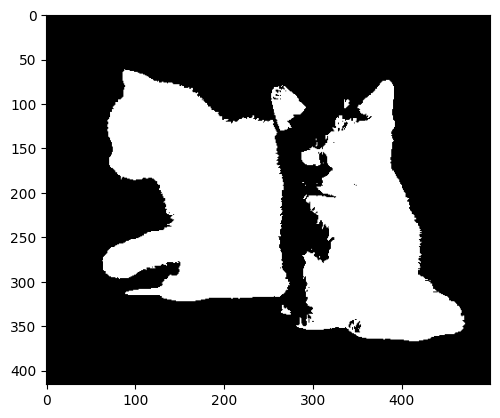

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()